<img src="../images/topcover.jpg" width="1000" height="50">

## Background

What does your gut say?

Colorectal cancer is one of the leading causes of cancer death in the US.[*source*](https://www.cancer.org/cancer/colon-rectal-cancer/detection-diagnosis-staging/detection.html) The complexity of the surgery and low quality of life can be prevented with early diagnosis by taking patient biopsies to pathologists. Therefore, more people are going for regular scopes and check-ups to detect the onset of the disease earlier. This increases the number of cases resulting in increase in workload and tighter schedule for doctors to work around with.

With slide scanning technology getting faster and more reliable, a larger volume of image data becomes available to train and validate various models. Therefore, classification of different tissue types can complement pathologists in making more accurate diagnosis within the tight schedule. 

Many a times, these pathologists are also involved with research work. Information on genetic mutations of patients that is driving the cancer can aid in research work by identifying the  gene mutations and making treatments more personalised.[*source*](https://www.nature.com/articles/s41374-020-00514-0) 

## Problem Statement

To aid in increasing workload of doctors, classifying histopathological images into respective tissues such as stroma and tumour via machine learning can help increase diagnosis efficiency and diagnosis. Here, the accuracy metric will be used. 

In addition, after diagnosis, to improve treatment and make it more personalized, clinical text data could be classified based on 9 categories of genetic mutations via natural language processing. If there is a specific treatment for that mutation, the patients get personalised treatment, otherwise more research can be carried out for mutations in that category to invent new therapies!  

Apart from diagnosis and research work, this machine learning models can be used for educational purposes for training-pathologists. It takes a decade of training to be a pathologists, therefore, a website that classifies images into their respective tissue type and clinical text data into mutation type can aid trainees to improve their diagnosis accuracy and treatment.  

Website for classification: https://treshapdesai.wixsite.com/website

## Data Used

#### 1) Colorectal cancer image data set: KAGGLE (https://www.kaggle.com/kmader/colorectal-histology-mnist/)
#### 2) Clinical text data set: KAGGLE (https://www.kaggle.com/c/msk-redefining-cancer-treatment/data)

## Data Dictionary

## Colorectal cancer dataset

In [53]:
#import relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# read colorectal cancer data set 
# dataset obtained from https://www.kaggle.com/kmader/colorectal-histology-mnist/

colorectal = pd.read_csv('../data/hmnist_64_64_L.csv')


In [5]:
# check first 5 rows of dataset

colorectal.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,134,99,119,130,142,169,152,139,117,87,...,112,89,73,100,120,120,126,140,195,2
1,55,64,74,63,74,75,71,73,70,77,...,79,85,86,77,68,66,65,68,69,2
2,114,116,136,152,132,100,151,150,127,205,...,128,157,159,205,182,143,129,89,122,2
3,86,82,88,85,103,93,98,109,104,115,...,79,80,109,128,89,85,80,63,48,2
4,168,143,140,139,129,123,123,141,137,101,...,231,199,183,195,179,134,142,158,149,2


##### The colorectal cancer dataset has 5000 histopathological images. All equally distributed between 8 classes (tissue type). There are 4095 columns representing 4095 pixels from the colorectal cancer images.  Here, pixel data image will be used to predict the class (tissue type).

In [57]:
# dataset information check

colorectal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 4097 entries, pixel0000 to label
dtypes: int64(4097)
memory usage: 156.3 MB


In [58]:
# check dataset unique values

colorectal.nunique()

pixel0000    236
pixel0001    238
pixel0002    241
pixel0003    239
pixel0004    238
            ... 
pixel4092    239
pixel4093    237
pixel4094    238
pixel4095    237
label          8
Length: 4097, dtype: int64

In [59]:
# check dataset missing values

colorectal.isnull().sum().sort_values(ascending=False)

label        0
pixel2047    0
pixel1373    0
pixel1372    0
pixel1371    0
            ..
pixel2725    0
pixel2724    0
pixel2723    0
pixel2722    0
pixel0000    0
Length: 4097, dtype: int64

##### There are no missing values. Therefore no columns or rows will be dropped.

In [60]:
# view dataset statistics

colorectal.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,137.412400,137.26200,137.523400,137.939400,137.292200,136.531000,136.712400,137.259200,137.394200,136.994600,...,136.855800,136.799000,136.995800,137.48780,136.815200,136.77380,136.866200,136.769000,136.847800,4.500000
std,74.241325,74.09328,74.141781,74.101279,74.298932,74.760707,74.649521,74.667226,74.918143,75.012463,...,74.420652,74.272306,74.308294,74.06259,74.085413,74.26376,74.310709,73.854691,73.835275,2.291517
min,13.000000,11.00000,10.000000,10.000000,9.000000,11.000000,12.000000,11.000000,10.000000,10.000000,...,10.000000,12.000000,9.000000,12.00000,11.000000,11.00000,11.000000,10.000000,12.000000,1.000000
25%,75.000000,74.00000,76.000000,76.000000,74.750000,73.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,73.750000,75.00000,75.000000,74.00000,74.000000,75.000000,75.000000,2.750000
50%,121.000000,122.00000,121.000000,121.000000,122.000000,120.000000,120.000000,120.000000,119.000000,119.000000,...,121.000000,122.000000,121.000000,122.00000,121.000000,121.00000,121.000000,121.000000,121.000000,4.500000
75%,222.000000,219.25000,220.000000,221.000000,221.000000,221.000000,221.000000,222.000000,223.000000,222.000000,...,220.000000,220.000000,221.000000,220.00000,218.250000,218.00000,218.250000,220.000000,219.250000,6.250000
max,248.000000,249.00000,252.000000,248.000000,250.000000,248.000000,250.000000,249.000000,251.000000,253.000000,...,253.000000,254.000000,252.000000,250.00000,249.000000,249.00000,249.000000,249.000000,250.000000,8.000000


In [61]:
# view datatypes

colorectal.dtypes

pixel0000    int64
pixel0001    int64
pixel0002    int64
pixel0003    int64
pixel0004    int64
             ...  
pixel4092    int64
pixel4093    int64
pixel4094    int64
pixel4095    int64
label        int64
Length: 4097, dtype: object

<AxesSubplot:>

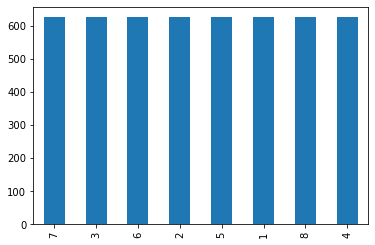

In [9]:
colorectal['label'].value_counts(sort=True).plot(kind='bar')


##### There is an equal proportion of images for each of the 8 classes. All images represent formalin-fixed paraffin-embedded human colorectal adenocarcinomas. 
##### The 8 classes are: 
##### 1. Tumour
##### 2. Stroma
##### 3. Complex
##### 4. Lympho 
##### 5. Debris
##### 6. Mucosa
##### 7. Adipose
##### 8. Empty


In [18]:
colorectal.groupby(['label']).mean()


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095
label,,,,,,,,,,,,,,,,,,,,,
1,79.0944,78.1584,79.1472,78.8720,77.7648,77.2400,78.2976,77.4480,76.1456,75.5312,...,80.8016,78.7856,78.9392,80.3856,79.8448,78.2592,78.7264,79.8848,79.7680,79.2160
2,123.6256,121.8368,120.4176,119.9952,120.5328,119.9696,119.6992,120.9392,122.0896,121.2016,...,120.9872,120.7600,120.6368,120.3248,122.3264,121.6560,121.9024,121.2048,121.1200,122.2384
3,99.7264,99.9136,100.2848,101.2064,99.0464,99.6096,100.2496,99.7824,99.6064,99.1856,...,97.8864,100.8304,100.5552,101.2992,101.5120,100.1632,101.3040,101.4160,99.9040,99.2272
4,76.8144,77.0544,77.2192,76.7536,74.5904,72.2464,70.8480,72.2912,71.8848,72.5248,...,72.9168,71.9888,71.5856,72.4368,72.4560,70.6464,72.0768,72.2816,72.5968,74.1136
5,140.9024,141.5536,143.8944,145.8624,144.0592,141.7488,143.6560,146.1632,147.4816,147.7712,...,141.3392,141.2272,143.1936,143.4016,143.4864,142.6960,141.9568,141.2624,140.8496,140.8896
6,109.3680,109.9712,109.2160,110.3200,111.3232,110.4320,110.0000,110.2608,110.3728,109.0144,...,113.7136,113.3472,112.0400,110.7936,112.1328,112.6208,109.7840,110.2400,111.0816,110.3824
7,227.7440,227.6176,228.0480,228.7008,229.4064,229.3680,229.1504,229.3392,229.8240,229.2384,...,227.2240,226.2768,225.7824,225.7840,226.3792,226.5728,226.5280,226.7616,226.9744,226.8736
8,242.0240,241.9904,241.9600,241.8048,241.6144,241.6336,241.7984,241.8496,241.7488,241.4896,...,241.9072,241.6304,241.6592,241.5408,241.7648,241.9072,241.9120,241.8784,241.8576,241.8416


In [48]:
# to plot distribution of each class

class_names = {1: "Tumor", 2: "Stroma", 3: "Complex", 4: "Lympho",
               5: "Debris", 6: "Mucosa", 7: "Adipose", 8: "Empty"}
class_colors = {1: "Blue", 2: "Green", 3: "Purple", 4: "Grey",
                5: "Navy", 6: "Teal", 7: "Yellow", 8: "Orange"}

C:\Users\Tresha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tresha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tresha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

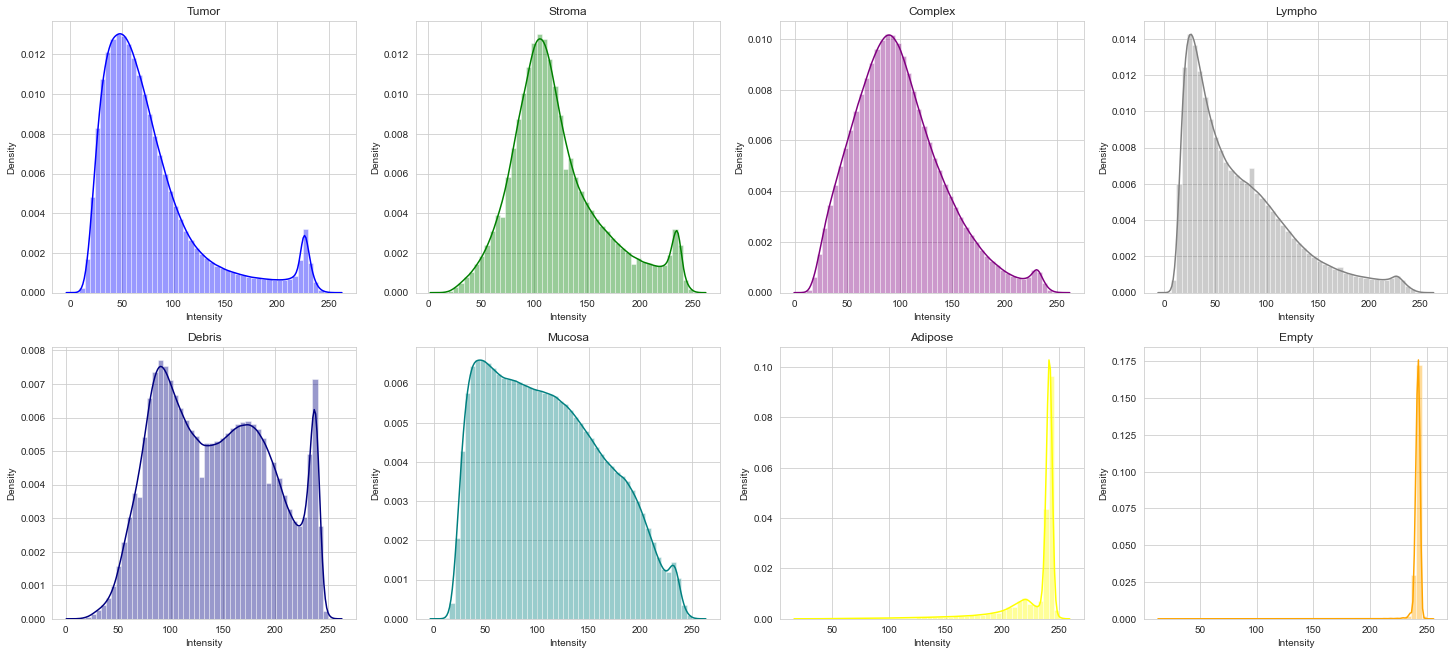

In [49]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2,4, figsize=(25,11))
for n in range(2):
    for m in range(4):
        class_idx = n*4+(m+1)
        sns.distplot(colorectal[colorectal.label == class_idx].drop("label", axis=1).values.flatten(),
                     ax=ax[n,m],
                     color=class_colors[class_idx])
        ax[n,m].set_title(class_names[class_idx])
        ax[n,m].set_xlabel("Intensity")
        ax[n,m].set_ylabel("Density")

##### The graphs above show the distribution of image intensity per class. It shows that the image intensity distribution across all classes are very different. Tumour, Stroma, Complex, Lympho and Mucosa are skewed to the left while Adipose and Empty have a spike towards the right-hand-side. This suggests that, classification of images according to their respective classes could be a good idea to adopt by pathologists to help them in making better diagnosis. 

In [109]:
# export colorectal cancer image dataset where only stroma and tumour classes are present for later analysis.

colorectal12 = colorectal.loc[colorectal['label'].isin(['1','2'])]

colorectal12.to_csv('../data/colorectal12.csv', index=False)

## Clinical text dataset

In [81]:
# read training and test, text and varants data

training_text = pd. read_csv("../data/training_text.txt", engine='python',sep='\|\|',skiprows=1, names=["ID", "Text"]).set_index('ID')
test_text = pd. read_csv("../data/test_text.txt", engine='python',sep='\|\|',skiprows=1, names=["ID", "Text"]).set_index('ID')
train_variants = pd. read_csv("../data/training_variants.txt").set_index('ID')
test_variants = pd. read_csv("../data/test_variants.txt").set_index('ID')

In [82]:
training_text.head()

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [83]:
train_variants.head()

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [84]:
# merge the training and test dataframes together on 'ID'

train = pd.merge(training_text, train_variants, how='inner', on='ID')



In [85]:
# see first 5 rows of train set

train.head()

,Text,Gene,Variation,Class
ID,,,,
0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [86]:
# check for null values

train.isnull().sum().sort_values(ascending=False)


Text         5
Class        0
Variation    0
Gene         0
dtype: int64

In [87]:
# check null values

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       3316 non-null   object
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 129.7+ KB


In [88]:
# drop nulls in train set

train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       3316 non-null   object
 1   Gene       3316 non-null   object
 2   Variation  3316 non-null   object
 3   Class      3316 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 129.5+ KB


In [89]:
# observe list of unique genes

train['Gene'].unique().tolist()

['FAM58A',
 'CBL',
 'SHOC2',
 'TERT',
 'DICER1',
 'PTPRT',
 'RHEB',
 'SHQ1',
 'CCND2',
 'RAD50',
 'CCND3',
 'RIT1',
 'CCNE1',
 'RYBP',
 'TGFBR1',
 'TGFBR2',
 'MSH6',
 'KMT2D',
 'LATS1',
 'PBRM1',
 'SF3B1',
 'LATS2',
 'EGFR',
 'NKX2-1',
 'EIF1AX',
 'ARID2',
 'BRD4',
 'HIST1H1C',
 'ERRFI1',
 'CHEK2',
 'PAK1',
 'TMPRSS2',
 'H3F3A',
 'ELF3',
 'ROS1',
 'ASXL2',
 'CDH1',
 'EPCAM',
 'EP300',
 'EPAS1',
 'TP53',
 'TP53BP1',
 'SMAD2',
 'SMAD3',
 'SMAD4',
 'CDK4',
 'AURKB',
 'CDK6',
 'FBXW7',
 'CDK8',
 'CDKN1A',
 'CDKN1B',
 'CDKN2A',
 'CDKN2B',
 'CDKN2C',
 'ASXL1',
 'ERBB2',
 'ERBB3',
 'ERBB4',
 'ERCC2',
 'BRIP1',
 'ERCC3',
 'ERCC4',
 'ABL1',
 'CEBPA',
 'ERG',
 'HLA-A',
 'HLA-B',
 'PDGFRA',
 'PDGFRB',
 'RBM10',
 'KDM5C',
 'ESR1',
 'ETV1',
 'ETV6',
 'TSC1',
 'IKZF1',
 'TSC2',
 'EWSR1',
 'ACVR1',
 'FOXA1',
 'MDM2',
 'ARID1A',
 'EZH2',
 'MDM4',
 'KLF4',
 'RXRA',
 'MAP3K1',
 'AXIN1',
 'BAP1',
 'MEN1',
 'FANCA',
 'FANCC',
 'MET',
 'U2AF1',
 'KMT2C',
 'FAT1',
 'ARID1B',
 'PIK3CA',
 'PIK3CB',
 'PIM1',
 

In [90]:
# observe number of unique genes

train['Gene'].nunique()

262

In [91]:
# convert to lower case

train['Text'] = train['Text'].str.lower()

In [92]:
# remove digits

train['Text'] = train['Text'].replace('\d+', '', regex = True)

In [93]:
# only letters or words

train['Text'] = train['Text'].replace('[^\w\s\+]', '', regex = True)

In [94]:
# export train file that contains all cancer cases

train.to_csv('../data/train_nlp.csv')

##### Here, we have exported the file with all types of cancer. However, we are keen on colorectal cancer data.

In [95]:
# number of text rows with colorectal cancer data

train['Text'].str.contains('colorectal').sum()

921

In [96]:
# view data specific for colorectal cancer

train_colorectal = train[train['Text'].str.contains('colorectal')]
train_colorectal


,Text,Gene,Variation,Class
ID,,,,
28,sequencing studies have identified many recurr...,TERT,C228T,7
31,sequencing studies have identified many recurr...,TERT,Promoter Mutations,7
33,the current world health organization classifi...,TERT,Amplification,2
34,sequencing studies have identified many recurr...,TERT,C250T,7
35,abstract dicer plays a critical role in micr...,DICER1,G1809R,4
...,...,...,...,...
3256,neuroblastoma the most common paediatric solid...,CASP8,Promoter Hypermethylation,4
3262,ret is a singlepass transmembrane receptor tyr...,RET,S891A,7
3269,oncogenic fusion of the ret rearranged during ...,RET,Fusions,2


[]

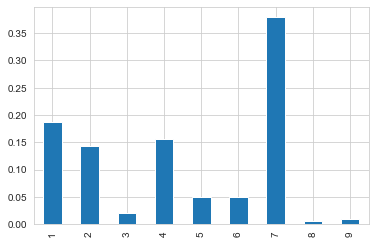

In [97]:
(train_colorectal['Class'].value_counts(sort=False) / train_colorectal.shape[0]).plot(kind='bar')
plt.plot()

##### Here, it is obvious that the classes are unbalanced with mutation class 3, 8 and 9 having the lowest number of colorectal cases and 7 being the highest.

In [98]:
# check number of class remaining for data specific to colorectal cancer data

train_colorectal['Class'].unique().tolist()

[7, 2, 4, 1, 5, 8, 9, 6, 3]

In [99]:
# to observe type of mutations in each class

class_info = train_colorectal.groupby('Class')['Variation'].apply(lambda x: list(np.unique(x)))

In [100]:
print(class_info)

Class
1    [A111P, A1843P, A209T, A290T, A4419S, A636P, C...
2    [A1374V, A2034V, A2425T, A859_L883delinsV, ACP...
3    [A41P, A41T, D2512G, D2512Y, F1888V, G264S, I1...
4    [3' Deletion, A1022E, A120S, A1685S, A598T, C1...
5    [A1066V, A272V, D32Y, E116K, E31K, E501G, E541...
6    [Amplification, C528S, D603G, E172K, E501K, E5...
7    [422_605trunc, A11_G12insGA, A1459P, A146T, A1...
8    [E40N, G311D, HMGA2-RAD51B Fusion, K700R, S492...
9    [R132G, R132H, R140Q, R172S, R625C, R625H, R62...
Name: Variation, dtype: object


In [101]:
# to observe type of mutations in each class

class_info.to_csv('../data/class_info.csv')

In [102]:
# export train_colorectal data for NLP 

train_colorectal.to_csv('../data/train_colorectal.csv')

In [103]:
# check number of unique values per class

train_colorectal.groupby(['Class']).agg(['nunique'])

,Text,Gene,Variation
,nunique,nunique,nunique
Class,,,
1,139,66,107
2,106,45,112
3,7,7,18
4,106,42,136
5,34,17,46
6,34,24,40
7,258,56,312
8,6,6,6


In [104]:
# get a glimpse of the unique values 

train_groupby = train_colorectal.groupby(['Class']).agg(['unique'])
train_groupby

,Text,Gene,Variation
,unique,unique,unique
Class,,,
1,[mesenchymal cell populations contribute to mi...,"[DICER1, PTPRT, SHQ1, TGFBR2, MSH6, KMT2D, ARI...","[Truncating Mutations, Deletion, A209T, Y280H,..."
2,[the current world health organization classif...,"[TERT, TGFBR2, EGFR, ROS1, AURKB, ERBB2, PDGFR...","[Amplification, R537P, A859_L883delinsV, G857E..."
3,[checkpoint kinase chek chk emerges as an imp...,"[CHEK2, AKT1, PMS2, MTOR, BRAF, RAD51C, KRAS]","[P85L, Q59E, L362R, L202F, I18V, D2512G, R2430..."
4,[ abstract dicer plays a critical role in mic...,"[DICER1, PTPRT, RAD50, TGFBR1, MSH6, EGFR, CHE...","[G1809R, G1809K, T1365M, Promoter Hypermethyla..."
5,[identification of a highrisk diseasecausing c...,"[MSH6, TP53, SMAD2, SMAD4, ERBB2, ERBB3, PIK3C...","[G39E, R1095H, V509A, T123A, W368H, R441P, R42..."
6,[recently a functionally defective chek varian...,"[CHEK2, SMAD2, SMAD4, CDKN1A, CDKN1B, ERBB4, R...","[I157T, Y406H, K375A, N387P, R428A, Y513A, S31..."
7,[sequencing studies have identified many recur...,"[TERT, RHEB, CCNE1, EGFR, NKX2-1, TMPRSS2, CDK...","[C228T, Promoter Mutations, C250T, Y35C, Y35N,..."
8,[the rna maturation is an important and comple...,"[SF3B1, EGFR, ERBB2, AKT1, RHOA, RAD51B]","[K700R, S492R, T798I, G311D, E40N, HMGA2-RAD51..."


In [105]:
train_colorectal.dtypes

Text         object
Gene         object
Variation    object
Class         int64
dtype: object

In [106]:
train_colorectal["text_count"] = train_colorectal["Text"].apply(lambda x: len(str(x).split(' ')))



<ipython-input-106-d210c859dccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_colorectal["text_count"] = train_colorectal["Text"].apply(lambda x: len(str(x).split(' ')))


In [107]:
train_colorectal.groupby(['Class']).describe()

text_count                                                          \
           count          mean           std      min       25%      50%   
Class                                                                      
1          173.0  12020.739884   7797.150135   2488.0   6436.00  11568.0   
2          132.0  13930.310606   9479.038353   1230.0   7331.25  12232.0   
3           18.0   5917.166667   3001.742303   4102.0   4326.00   4326.0   
4          144.0  11977.673611  10756.039682    114.0   5136.00   7576.0   
5           46.0   9375.369565   3830.904114   1542.0   5912.75  10112.0   
6           45.0  10040.555556   5108.511643   1796.0   5913.00  10520.0   
7          349.0  14204.647564  11293.318574    450.0   6681.00  10566.0   
8            6.0  11719.666667   6264.973956   2120.0   9193.25  12167.5   
9            8.0  19996.875000  10704.127874  11587.0  11587.00  16133.5   

                          
            75%      max  
Class                     
1      15789.00  54099.0  
2      17704.00  61679.0  
3       6138.75  12331.0  
4      14924.75  43209.0  
5      12048.00  18051.0  
6      12719.00  24398.0  
7      18422.00  77202.0  
8      14203.50  20779.0  
9      24207.00  39263.0

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>]], dtype=object)

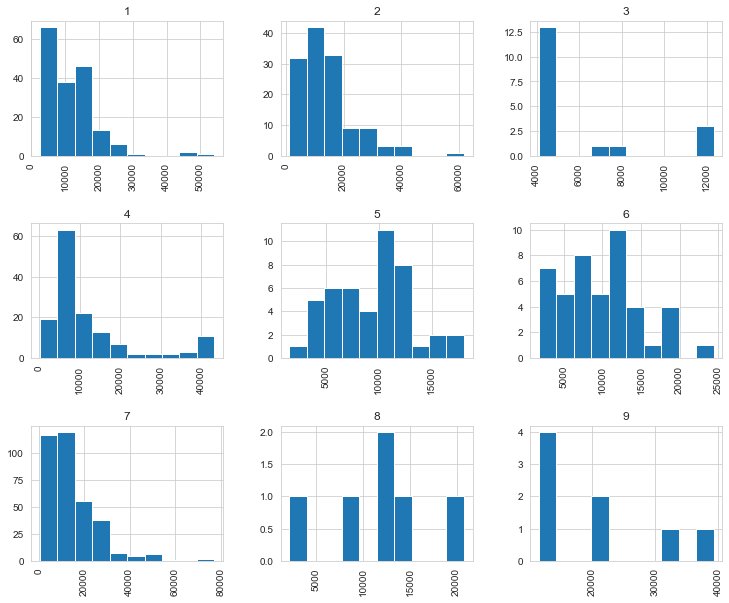

In [108]:
train_colorectal.hist(by='Class', column = 'text_count', figsize = [12,10])

##### The distributions of the number of words are left skewed for Class 1,2,4 and 7. These classes also have more clinical text data cases. The distribution of the remaining rows do not appear smooth due to small number of classes. This could be a drawback and more data is required in the future as it could affect the modelling and classification process in later notebooks. 